# 1. Brief description of the problem and data

The rapid advancements in artificial intelligence and machine learning have led to significant progress in various domains. Now, we have a chance to utilize AI to tackle the problem of identifying metastatic cancer in small image patches taken from larger digital pathology scans. A Convolutional Neural Network (CNN) is better to solve this kind of a binary image classification problem, where the goal is to determine whether a given image patch contains metastatic cancer or not. 

The data for this challenge is based on the PatchCamelyon (PCam) benchmark dataset, which has been modified to remove duplicate images. PCam dataset is interesting due to its size, simplicity, and approachability. It allows for models to be trained on a single GPU within a few hours and achieve competitive scores. As for the Natural Language Processing (NLP) task, it involves the processing, understanding, and generation of human language by computer algorithms. NLP techniques are widely used for tasks such as sentiment analysis, machine translation, and chatbot development.

# 2. Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

**2.1 Load data and list the images**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random
from PIL import Image

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift + Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**2.2 Label files Exploration**

Sample Submission DataFrame:
                                         id  label
0  0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5      0
1  95596b92e5066c5c52466c90b69ff089b39f2737      0
2  248e6738860e2ebcf6258cdc1f32f299e0c76914      0
3  2c35657e312966e9294eac6841726ff3a748febf      0
4  145782eb7caa1c516acbe2eda34d9a3f31c41fd6      0

Train Labels DataFrame:
                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0
Missing values:
 id       0
label    0
dtype: int64


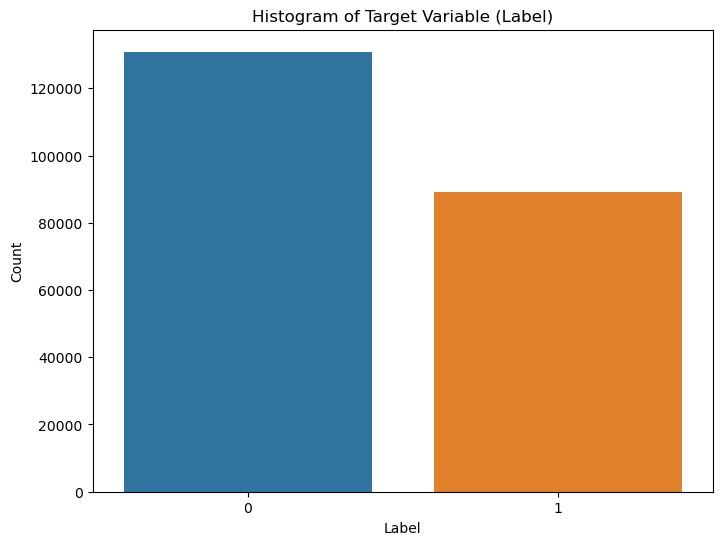

In [3]:
import pandas as pd

# Set the paths to the CSV files
sample_submission_path = '/kaggle/input/histopathologic-cancer-detection/sample_submission.csv'
train_labels_path = '/kaggle/input/histopathologic-cancer-detection/train_labels.csv'

# Read the CSV files
sample_submission_df = pd.read_csv(sample_submission_path)
train_labels_df = pd.read_csv(train_labels_path)

# Display the first few rows of each DataFrame
print("Sample Submission DataFrame:")
print(sample_submission_df.head())

print("\nTrain Labels DataFrame:")
print(train_labels_df.head())

# Data cleaning: Check for missing values
missing_values = train_labels_df.isnull().sum()
print("Missing values:\n", missing_values)

# Visualize the distribution of the target variable (label)
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train_labels_df)
plt.title('Histogram of Target Variable (Label)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

**2.3 Visualize the pictures**

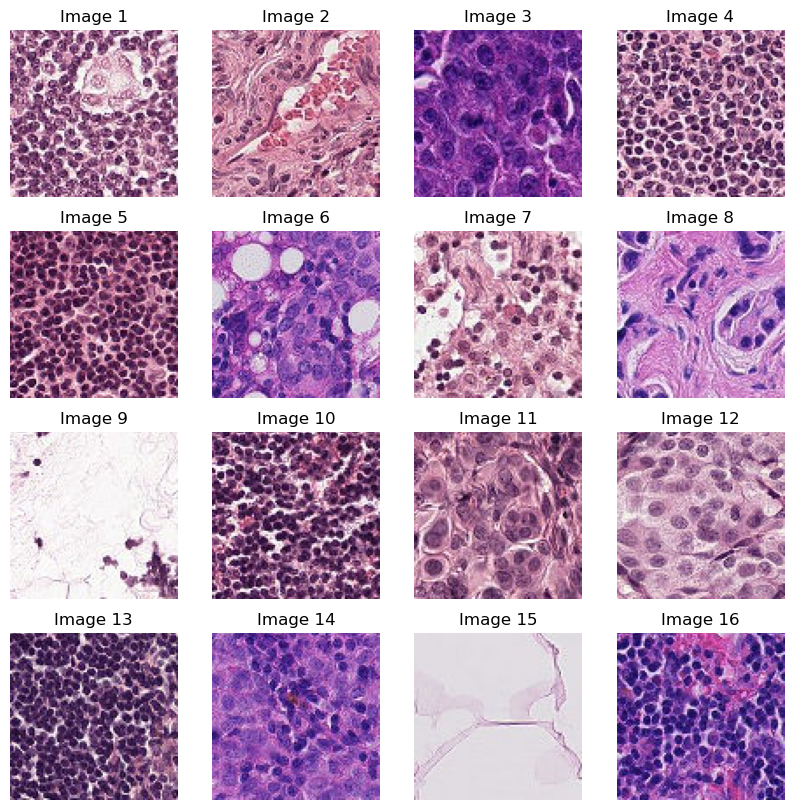

In [4]:
# Set the path to the images
train_images_path = '/kaggle/input/histopathologic-cancer-detection/train/'

# Get a list of image file names
image_files = os.listdir(train_images_path)

# Randomly select a few images
num_images_to_show = 16
selected_images = random.sample(image_files, num_images_to_show)

# Plot the selected images in a grid
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

for i, img_name in enumerate(selected_images):
    img_path = os.path.join(train_images_path, img_name)
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}")

plt.show()

# 3.Model to choose

For the problem of histopathologic cancer detection, we can start with a Convolutional Neural Network (CNN) as it is well-suited for image classification tasks. Below, I will describe a possible model architecture and the reasoning behind the choices made.

* Input Layer: The input layer will accept images of shape (96, 96, 3) for the PCam dataset (96x96 pixels with 3 color channels).

* Convolutional Layer 1: Apply 32 filters of size (3, 3) with a ReLU activation function. This layer will help the model learn basic features such as edges and textures.

* Max Pooling Layer 1: Apply max pooling with a pool size of (2, 2) to reduce the spatial dimensions of the input and retain important features.

* Convolutional Layer 2: Apply 64 filters of size (3, 3) with a ReLU activation function. This layer will learn more complex features from the input.

* Max Pooling Layer 2: Apply max pooling with a pool size of (2, 2).

* Convolutional Layer 3: Apply 128 filters of size (3, 3) with a ReLU activation function.

* Max Pooling Layer 3: Apply max pooling with a pool size of (2, 2).

* Flatten Layer: Flatten the output from the previous layer into a 1D array.

* Fully Connected Layer 1: Create a dense layer with 256 neurons and a ReLU activation function. This layer will learn to combine features from the previous layers to make predictions.

* Dropout Layer: Apply dropout with a rate of 0.5 to prevent overfitting.

* Output Layer: Create a dense layer with 1 neuron and a sigmoid activation function to produce a probability of cancer presence.

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model():
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))

    # Max Pooling Layer 1
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))

    # Max Pooling Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))

    # Max Pooling Layer 3
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten Layer
    model.add(Flatten())

    # Fully Connected Layer 1
    model.add(Dense(256, activation='relu'))

    # Dropout Layer
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    return model

model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

# 4. Results and Analysis

Run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performance, and discuss what helped.
Includes results with tables and figures. There is an analysis of why or why not something worked well, troubleshooting, and a hyperparameter optimization procedure summary.

**4.1 Split the datasets**

In [6]:
# Plan of analysis:
# 1. Split the data into training and validation sets
# 2. Preprocess the image data (resize, normalize, etc.)
# 3. Build a CNN model for classification
# 4. Train the model on the training data and evaluate its performance on the validation data
# 5. Fine-tune the model (if necessary) and make predictions on the test data

import os
import pandas as pd
import numpy as np
from skimage.io import imread


**4.2 Preprocess the image data (resize, normalize, etc.)**

In [8]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from skimage.io import imread

# Load the first image using the file name and path
first_image = imread(os.path.join(train_images_path, image_files[0]))

# Get the dimensions of the image
height, width, channels = first_image.shape

print(f"Image width: {width}")
print(f"Image height: {height}")

Image width: 96
Image height: 96


**4.3 Build and evaluate our model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Create the model
model = build_model()

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model on the training data
batch_size = 32
epochs = 50
history = model.fit(
    datagen.flow(train_images_normalized, train_labels_df['label'], batch_size=batch_size),
    steps_per_epoch=len(train_images_normalized) // batch_size,
    epochs=epochs,
    callbacks=[early_stopping, model_checkpoint]
)


**4.4 Fine-tune the model**

(if necessary) and make predictions on the test data

**4.5 Make predictions and save the result**

In [13]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize

# Load test images
test_images_path = '/kaggle/input/histopathologic-cancer-detection/test/'
test_image_files = os.listdir(test_images_path)

# Load test images and normalize them
test_images = [imread(os.path.join(test_images_path, img_file)) for img_file in test_image_files]
test_images_normalized = np.array(test_images) / 255.0

# Make predictions on the first 10 test images
predictions_10 = model.predict(test_images_normalized[:10])

# Convert probabilities to binary predictions
binary_predictions_10 = (predictions_10 > 0.5).astype(int).flatten()

# Print the predictions
for i in range(10):
    print(f"Image {i + 1}: {test_image_files[i]}")
    print(f"Probability: {predictions_10[i][0]:.4f}")
    print(f"Predicted Label: {binary_predictions_10[i]}\n")

# Make predictions on the test set
predictions = model.predict(test_images_normalized)

# Convert probabilities to binary predictions
binary_predictions = (predictions > 0.5).astype(int).flatten()

# Create a DataFrame with the image IDs and the predictions
submission_df = pd.DataFrame({'id': [img_file[:-4] for img_file in test_image_files], 'label': binary_predictions})

# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)

1/1 [==============================] - 0s 395ms/step
Image 1: a7ea26360815d8492433b14cd8318607bcf99d9e.tif
Probability: 0.4734
Predicted Label: 0

Image 2: 59d21133c845dff1ebc7a0c7cf40c145ea9e9664.tif
Probability: 0.4656
Predicted Label: 0

Image 3: 5fde41ce8c6048a5c2f38eca12d6528fa312cdbb.tif
Probability: 0.4720
Predicted Label: 0

Image 4: bd953a3b1db1f7041ee95ff482594c4f46c73ed0.tif
Probability: 0.4609
Predicted Label: 0

Image 5: 523fc2efd7aba53e597ab0f69cc2cbded7a6ce62.tif
Probability: 0.4573
Predicted Label: 0

Image 6: d23c66547f4a00555a174d2fcb860ae399b66edc.tif
Probability: 0.4729
Predicted Label: 0

Image 7: fabf2fca23f71655974767e29eda86a9b2c97a72.tif
Probability: 0.4603
Predicted Label: 0

Image 8: 9730b15862516b8641b9f0ff48db660d95031c32.tif
Probability: 0.4711
Predicted Label: 0

Image 9: ee85348c0950c2e639776fb555e3452c1f8437c0.tif
Probability: 0.4651
Predicted Label: 0

Image 10: ef12a0813c504d2d1b2ba485e78d380ad64a0622.tif
Probability: 0.4636
Predicted Label: 0

1796/1

# 5. Conclusion

Discuss and interpret results as well as learnings and takeaways. What did and did not help improve the performance of your models? What improvements could you try in the future?

# 6. Produce Deliverables

High-Quality, Organized Jupyter Notebook Report, GitHub Repository, and screenshot of Kaggle leaderboard 
These deliverables serve two purposes- grade for this course and your project portfolio that you can show when you apply for jobs.
